In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from copy import deepcopy

sns.set()
%matplotlib inline

In [35]:
usa_df = pd.read_csv('usa_data.csv')
print(usa_df.shape)
usa_df.head()

(52, 28)


,Country,Year,Top_1,Tax_Rev_to_GDP,1100,1200,2100,2200,2300,4100,...,6000,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
0,United States,1965,NaN,23.500,31.668882,16.399037,5.064602,7.605585,0.616685,13.721546,...,0.0,NaN,NaN,-46.736174,70.00,742.29025,849.208316,1.144038,NaN,NaN
1,United States,1966,0.12641,23.767,32.366109,17.257410,5.489479,7.771478,0.498213,13.258807,...,0.0,NaN,NaN,1.136170,70.00,813.41375,776.779826,0.954963,-8.528943,-16.527015
2,United States,1967,0.12145,24.844,32.308931,17.354742,6.424965,8.510047,0.851484,12.599663,...,0.0,0.12641,NaN,4.531493,70.00,859.95625,866.201096,1.007262,11.511791,5.476557
3,United States,1968,0.12419,24.288,34.797803,14.263367,6.526761,8.369659,0.706239,12.691711,...,0.0,0.12145,0.12641,-2.237965,75.25,940.64650,939.513009,0.998795,8.463613,-0.840579
4,United States,1969,0.11511,26.606,36.793030,15.243930,6.349534,8.057200,0.655912,11.731072,...,0.0,0.12419,0.12145,9.543808,77.00,1017.61500,925.842498,0.909816,-1.455063,-8.908625


In [36]:
usa_df_clean = usa_df.dropna()
usa_df_clean.reset_index(drop=True, inplace=True)

In [37]:
X = usa_df_clean.drop(['Country', 'Year', '1100', 'Top_1', '6000'], axis=1)
X.head()

,Tax_Rev_to_GDP,1200,2100,2200,2300,4100,4300,4400,4600,5100,...,5200,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
0,24.288,14.263367,6.526761,8.369659,0.706239,12.691711,1.794413,0.189824,0.0,17.948706,...,2.711517,0.12145,0.12641,-2.237965,75.25,940.64650,939.513009,0.998795,8.463613,-0.840579
1,26.606,15.243930,6.349534,8.057200,0.655912,11.731072,1.716080,0.199260,0.0,16.930561,...,2.323420,0.12419,0.12145,9.543808,77.00,1017.61500,925.842498,0.909816,-1.455063,-8.908625
2,25.721,13.214106,6.911866,8.473333,0.701775,12.306352,1.677104,0.168758,0.0,17.581949,...,2.370206,0.11511,0.12419,-3.326317,71.75,1073.31050,777.727508,0.724606,-15.997860,-20.356842
3,23.869,10.846745,7.285336,9.002361,0.698864,13.579777,1.736039,0.161083,0.0,18.899110,...,2.569079,0.10793,0.11511,-7.200342,70.00,1164.84975,921.061232,0.790712,18.429813,9.123054
4,24.414,11.702029,7.208767,8.979179,0.649332,13.457110,2.149535,0.184291,0.0,18.033735,...,2.490330,0.11084,0.10793,2.283296,70.00,1279.11200,1028.165833,0.803812,11.628391,1.656699


In [38]:
X.tail()

,Tax_Rev_to_GDP,1200,2100,2200,2300,4100,4300,4400,4600,5100,...,5200,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
42,23.494,7.595761,11.559450,13.142573,1.402394,12.374008,0.555354,0.0,0.213865,15.418115,...,2.910282,0.18541,0.19520,2.072381,35.0,14992.05200,11966.642976,0.798199,23.095895,18.636480
43,23.900,7.392246,8.512476,13.100657,1.260035,11.841809,0.387709,0.0,0.198047,15.494785,...,3.019669,0.19800,0.18541,1.728101,35.0,15542.58175,13398.819683,0.862072,11.968074,8.002082
44,24.069,8.414267,8.429897,13.022758,1.212482,11.372031,0.488496,0.0,0.187786,15.359857,...,3.009708,0.19600,0.19800,0.707113,35.0,16197.00725,14459.292240,0.892714,7.914671,3.554476
45,25.653,8.264622,10.662299,12.133386,1.268727,10.480465,0.610216,0.0,0.176673,14.697469,...,2.840709,0.20779,0.19600,6.581079,39.6,16784.85050,17420.765079,1.037886,20.481451,16.261919
46,25.926,8.814245,10.603059,11.950516,1.305074,10.038009,0.532539,0.0,0.169641,14.555464,...,2.753763,0.19592,0.20779,1.064203,39.6,17521.74700,20470.685079,1.168302,17.507383,12.565479


In [39]:
y = usa_df_clean.Top_1

In [64]:
y = y*100
y

0     12.419000
1     11.511000
2     10.793000
3     11.084000
4     11.119000
5     11.019000
6     10.552000
7     10.583000
8     10.406000
9     10.751000
10    10.630000
11    11.150000
12    10.671000
13    11.052000
14    11.264000
15    11.514000
16    12.496000
17    12.553000
18    12.209000
19    13.306999
20    14.876001
21    14.465000
22    14.542000
23    13.891000
24    15.013000
25    14.644000
26    14.687000
27    15.283000
28    15.967000
29    16.629000
30    16.923000
31    17.709000
32    18.266000
33    17.268001
34    17.058000
35    17.202000
36    18.322000
37    19.372000
38    20.100001
39    19.867000
40    19.520000
41    18.540999
42    19.800000
43    19.599999
44    20.779000
45    19.592001
46    20.199999
Name: Top_1, dtype: float64

### Statistical Analysis

In [65]:
usa_df_clean.corr().loc['Top_1']

Year                 0.958483
Top_1                1.000000
Tax_Rev_to_GDP       0.227950
1100                 0.253562
1200                -0.456174
2100                 0.557730
2200                 0.432937
2300                 0.839563
4100                -0.235287
4300                -0.652938
4400                -0.782083
4600                 0.836830
5100                -0.729743
5110                 0.694521
5120                -0.783613
5121                -0.836810
5200                 0.585227
6000                -0.477728
Top_1_AR1            0.981744
Top_1_AR2            0.966554
Tax_Rev_Change       0.035974
Top_Marginal_Rate   -0.784991
GDP                  0.973326
TMC_SE               0.951943
TMC_to_GDP           0.716869
TMC_SE_Change        0.075954
TMC_to_GDP_Change    0.225563
Name: Top_1, dtype: float64

In [66]:
cols = usa_df_clean.columns

In [67]:
cols_trimmed = list(cols[2:4]) + list(cols[19:])

In [68]:
# Drop some columns in order to have a cleaner pair plot

trimmed_df = usa_df_clean[cols_trimmed]

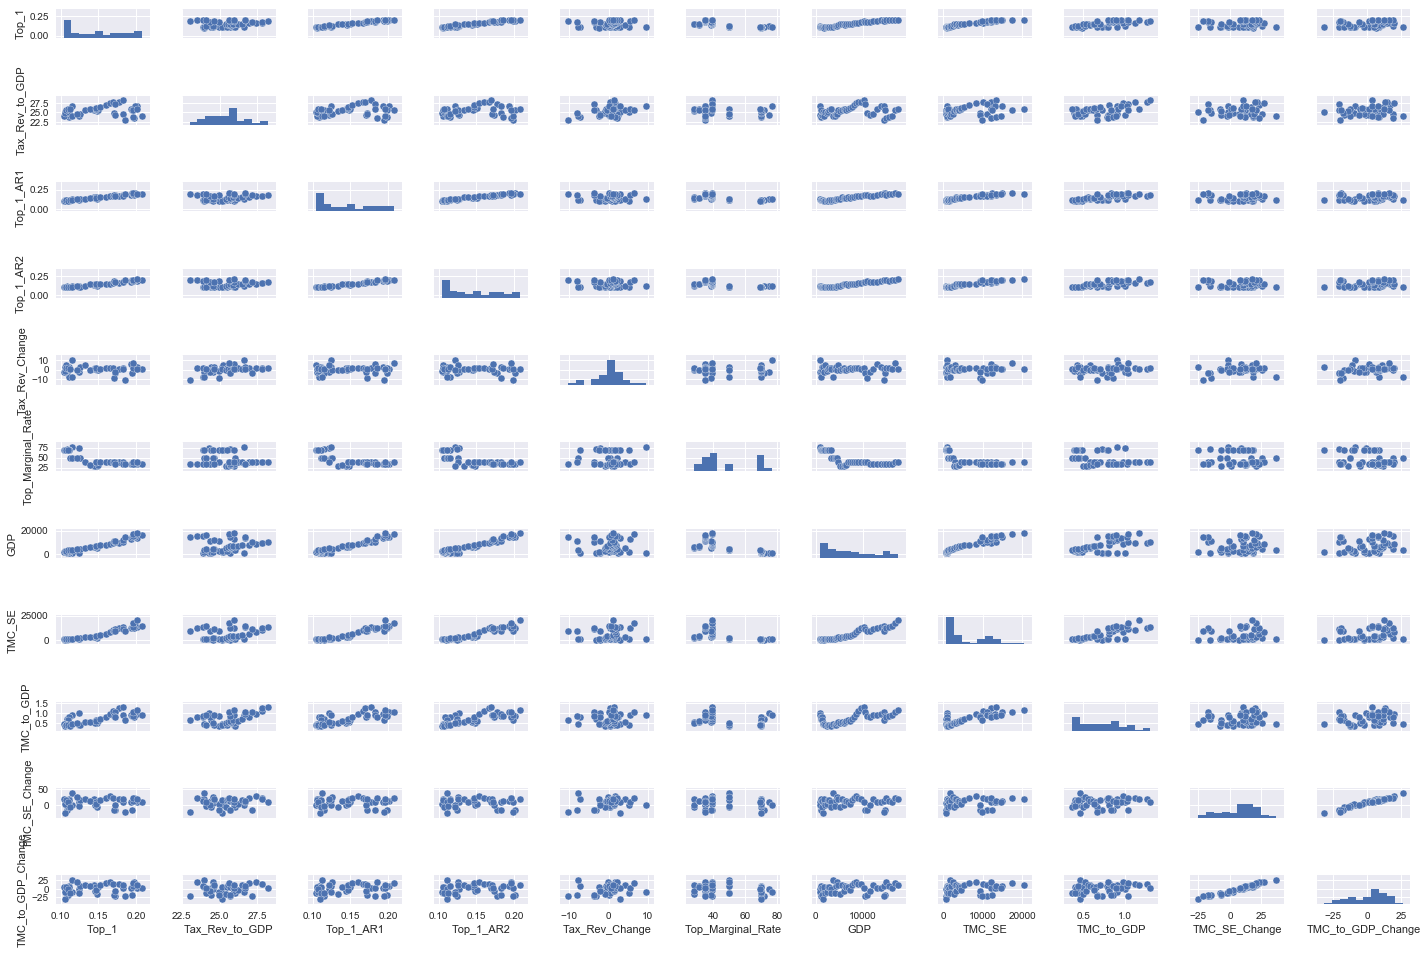

In [27]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(trimmed_df, size = 1.2, aspect=1.5)

In [32]:
cols_tax = [cols[2]] + list(cols[4:19])
print(cols_tax)

['Top_1', '1100', '1200', '2100', '2200', '2300', '4100', '4300', '4400', '4600', '5100', '5110', '5120', '5121', '5200', '6000']


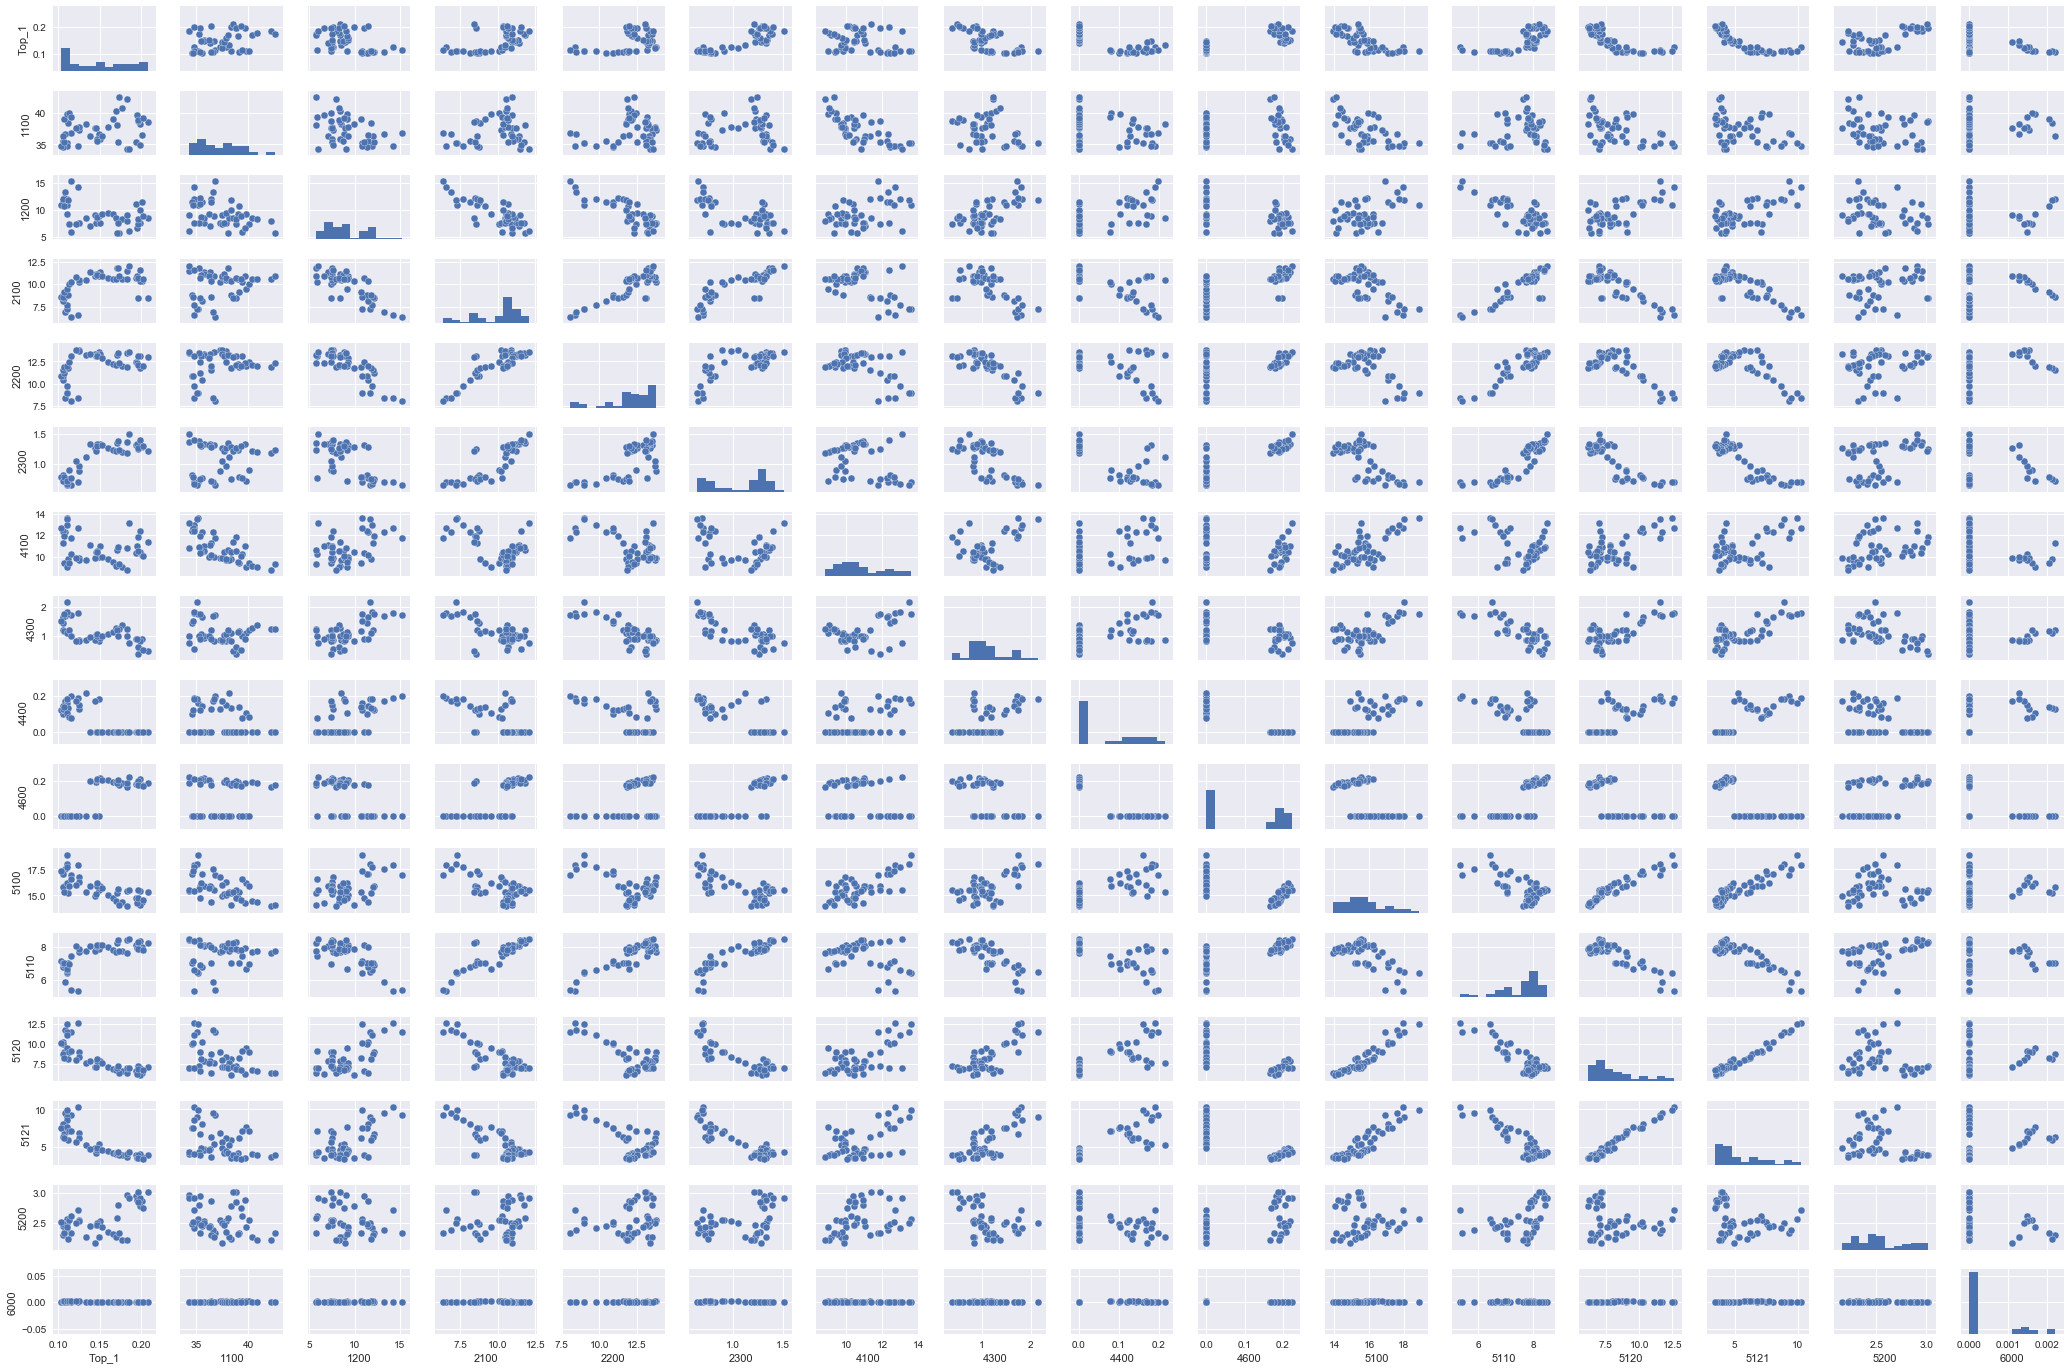

In [33]:
# Look at the tax columns
tax_df = usa_df_clean[cols_tax]

# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(tax_df, size = 1.2, aspect=1.5)

### Modeling

In [40]:
years = usa_df_clean.Year
train_size = int(len(years) * .7)
test_size = len(years) - train_size
print(len(years), train_size, test_size)

47 32 15


In [41]:
lr = LinearRegression()

# Split the data into training and test sets
X_train, y_train = X.loc[0:train_size, :] , y.loc[0:train_size]
X_test, y_test = X.loc[train_size:train_size+test_size, :] , y.loc[train_size:train_size+test_size]
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.2182033486084729

In [42]:
#lr.fit(X, y)

In [43]:
#Now let's change the top marginal income rate
hi_rate = np.ones(len(X))*70.0
X_hi_rate = X.copy()

X_hi_rate['Top_Marginal_Rate'] = hi_rate

X_hi_rate.head()

,Tax_Rev_to_GDP,1200,2100,2200,2300,4100,4300,4400,4600,5100,...,5200,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
0,24.288,14.263367,6.526761,8.369659,0.706239,12.691711,1.794413,0.189824,0.0,17.948706,...,2.711517,0.12145,0.12641,-2.237965,70.0,940.64650,939.513009,0.998795,8.463613,-0.840579
1,26.606,15.243930,6.349534,8.057200,0.655912,11.731072,1.716080,0.199260,0.0,16.930561,...,2.323420,0.12419,0.12145,9.543808,70.0,1017.61500,925.842498,0.909816,-1.455063,-8.908625
2,25.721,13.214106,6.911866,8.473333,0.701775,12.306352,1.677104,0.168758,0.0,17.581949,...,2.370206,0.11511,0.12419,-3.326317,70.0,1073.31050,777.727508,0.724606,-15.997860,-20.356842
3,23.869,10.846745,7.285336,9.002361,0.698864,13.579777,1.736039,0.161083,0.0,18.899110,...,2.569079,0.10793,0.11511,-7.200342,70.0,1164.84975,921.061232,0.790712,18.429813,9.123054
4,24.414,11.702029,7.208767,8.979179,0.649332,13.457110,2.149535,0.184291,0.0,18.033735,...,2.490330,0.11084,0.10793,2.283296,70.0,1279.11200,1028.165833,0.803812,11.628391,1.656699


In [44]:
#Now let's change the top marginal income rate to be really low
low_rate = np.ones(len(X))*20.0
X_low_rate = X.copy()
X_low_rate['Top_Marginal_Rate'] = low_rate

X_low_rate.head()

,Tax_Rev_to_GDP,1200,2100,2200,2300,4100,4300,4400,4600,5100,...,5200,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
0,24.288,14.263367,6.526761,8.369659,0.706239,12.691711,1.794413,0.189824,0.0,17.948706,...,2.711517,0.12145,0.12641,-2.237965,20.0,940.64650,939.513009,0.998795,8.463613,-0.840579
1,26.606,15.243930,6.349534,8.057200,0.655912,11.731072,1.716080,0.199260,0.0,16.930561,...,2.323420,0.12419,0.12145,9.543808,20.0,1017.61500,925.842498,0.909816,-1.455063,-8.908625
2,25.721,13.214106,6.911866,8.473333,0.701775,12.306352,1.677104,0.168758,0.0,17.581949,...,2.370206,0.11511,0.12419,-3.326317,20.0,1073.31050,777.727508,0.724606,-15.997860,-20.356842
3,23.869,10.846745,7.285336,9.002361,0.698864,13.579777,1.736039,0.161083,0.0,18.899110,...,2.569079,0.10793,0.11511,-7.200342,20.0,1164.84975,921.061232,0.790712,18.429813,9.123054
4,24.414,11.702029,7.208767,8.979179,0.649332,13.457110,2.149535,0.184291,0.0,18.033735,...,2.490330,0.11084,0.10793,2.283296,20.0,1279.11200,1028.165833,0.803812,11.628391,1.656699


### Time Series 'Feed-Forward' Algorithm

In [45]:
def time_series_predict(model, X, ts_col, n=1):
    '''
    Parameters
    ----------
    model : trained model to make predictions with
    X : time-series of features to use to make predictions
    ts_col : string, which column has the primary time-series
    n : number of shifts; assumption is the ts_col_1...n-1 is column
        naming convention
    Returns
    -------
    y : predictions
    
    Iteratively makes time series predictions in order to take the 
    changes to predicted y into account
    '''
    X_t = deepcopy(X)
    n_features = len(X_t.index)
    y = pd.Series(np.zeros(len(X_t)))
    for i in range(len(X_t)):
        y.loc[i] = model.predict(np.array(X_t.loc[i]).reshape(1, -1))
        if i < (len(X_t)-1):
            X_t.loc[i+1, ts_col] = y.loc[i]
    return X_t, y

### Testing Validity of Algorithm

In [69]:
preds = lr.predict(X)
X_algo, preds_algo = time_series_predict(lr, X, 'Top_1_AR1')
years = usa_df_clean.Year.unique()

In [47]:
print('Standard input score: ' , lr.score(X, y))
print('Algo computed input score: ', lr.score(X_algo, y))

Standard input score:  0.9722565438979317
Algo computed input score:  0.9761069368508763


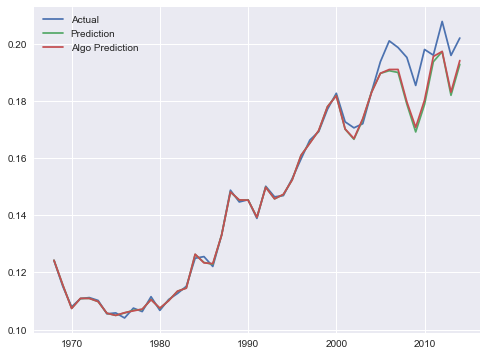

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(years, y)
plt.plot(years, preds)
plt.plot(years, preds_algo)

plt.legend(['Actual', 'Prediction', 'Algo Prediction'], loc='upper left')

plt.show()

### Predicting and Viz

In [18]:
preds = lr.predict(X)
#_, preds_new_rate = time_series_predict(lr, X_new_rate, 'Top_1_AR1')
#_, preds_low_rate = time_series_predict(lr, X_low_rate, 'Top_1_AR1')


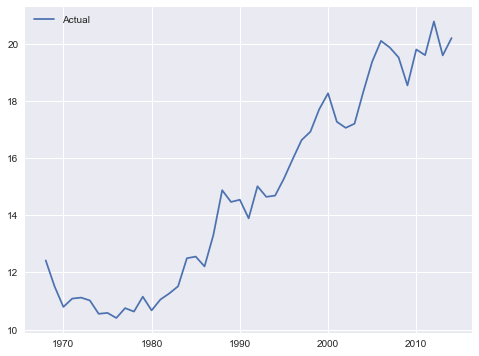

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(years, y)
#plt.plot(years, preds_new_rate)
#plt.plot(years, preds_low_rate)
#plt.plot(years, preds)

plt.legend(['Actual', 'High Rate', 'Low Rate'], loc='upper left')

plt.show()

In [62]:
len(y_test)

15

In [70]:
lasso = linear_model.Lasso(alpha=.0000001)

In [75]:
y_test

32    0.18266
33    0.17268
34    0.17058
35    0.17202
36    0.18322
37    0.19372
38    0.20100
39    0.19867
40    0.19520
41    0.18541
42    0.19800
43    0.19600
44    0.20779
45    0.19592
46    0.20200
Name: Top_1, dtype: float64

In [74]:
test_pred

array([0.18191184, 0.16658177, 0.16422154, 0.17571906, 0.18916595,
       0.19707711, 0.19849658, 0.19716166, 0.17961433, 0.16868375,
       0.18446187, 0.19598454, 0.20167496, 0.19502199, 0.20796307])

In [78]:
lasso = linear_model.Lasso(alpha=.0000001)

lasso.fit(X_train, y_train)
# Evaluate the model against the testing data
print(lasso.score(X_test, y_test))

test_pred = lasso.predict(X_test)
print(mean_squared_error(y_test, test_pred)  *10)


0.5253064146029742
0.000617831965658034


/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
lasso.fit(X, y)

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
preds = lasso.predict(X)
_, preds = time_series_predict(lasso, X, 'Top_1_AR1')
_, preds_hi_rate = time_series_predict(lasso, X_hi_rate, 'Top_1_AR1')
_, preds_low_rate = time_series_predict(lasso, X_low_rate, 'Top_1_AR1')


In [79]:
for i, col in enumerate(X.columns):
    print(col, 1000*lasso.coef_[i])

Tax_Rev_to_GDP -3.144812612879413
1200 1.812414651566435
2100 -4.004828215442889
2200 -1.645877358756675
2300 35.25628808788809
4100 -3.082957981249535
4300 -4.008788717110844
4400 -26.58828552344713
4600 26.21737076258992
5100 -10.872715125963131
5110 16.11457019002099
5120 2.9286374539465645
5121 8.611525638476303
5200 12.293559637618044
Top_1_AR1 -64.72393970921064
Top_1_AR2 6.543837125508414
Tax_Rev_Change 0.3066174582390495
Top_Marginal_Rate -0.6687371749219291
GDP 0.0010791327869846975
TMC_SE 0.002049202079441646
TMC_to_GDP 30.62462663374502
TMC_SE_Change 1.2421055249035096
TMC_to_GDP_Change -1.4105285952109117


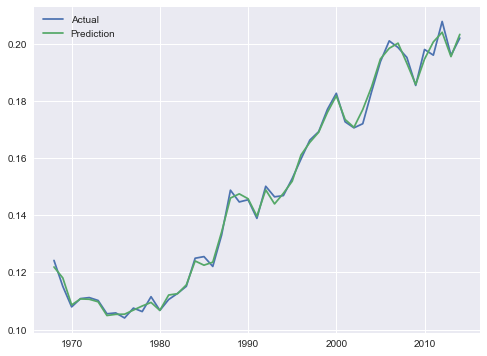

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(years, y)
plt.plot(years, preds)

plt.legend(['Actual', 'Prediction'], loc='upper left')

plt.show()

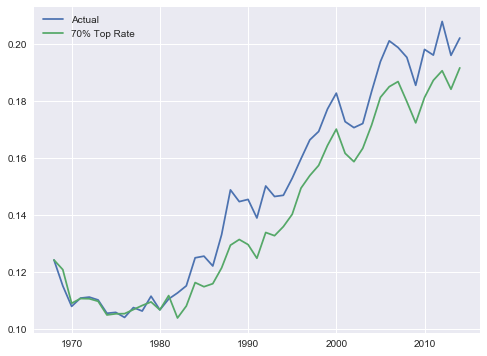

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(years, y)
#plt.plot(years, preds)
plt.plot(years, preds_hi_rate)
#plt.plot(years, preds_low_rate)

plt.legend(['Actual', '70% Top Rate'], loc='upper left')


#plt.legend(['Actual', '70% Top Rate', '20% Top Rate'], loc='upper left')

plt.show()

In [26]:
usa_df.head(3)

,Country,Year,Top_1,Tax_Rev_to_GDP,1100,1200,1300,2100,2200,2300,...,6000,Top_1_AR1,Top_1_AR2,Tax_Rev_Change,Top_Marginal_Rate,GDP,TMC_SE,TMC_to_GDP,TMC_SE_Change,TMC_to_GDP_Change
0,United States,1965,NaN,23.500,31.668882,16.399037,0.0,5.064602,7.605585,0.616685,...,0.0,NaN,NaN,-46.736174,70.0,742.29025,849.208316,1.144038,NaN,NaN
1,United States,1966,0.12641,23.767,32.366109,17.257410,0.0,5.489479,7.771478,0.498213,...,0.0,NaN,NaN,1.136170,70.0,813.41375,776.779826,0.954963,-8.528943,-16.527015
2,United States,1967,0.12145,24.844,32.308931,17.354742,0.0,6.424965,8.510047,0.851484,...,0.0,0.12641,NaN,4.531493,70.0,859.95625,866.201096,1.007262,11.511791,5.476557


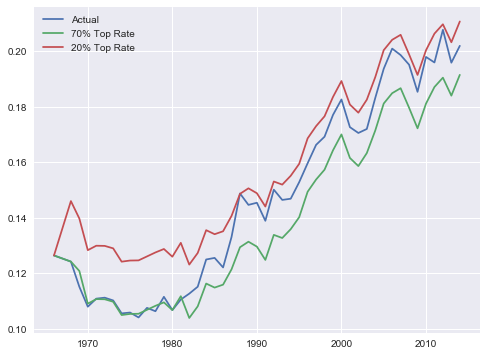

In [58]:
plt.figure(figsize=(8, 6))
top1_66 = [usa_df.loc[1, 'Top_1']]
plt.plot([1966] + list(years), top1_66 + list(y))
plt.plot([1966] + list(years), top1_66 + list(preds_new_rate))
plt.plot([1966] + list(years), top1_66 + list(preds_low_rate))

plt.legend(['Actual', '70% Top Rate', '20% Top Rate'], loc='upper left')

plt.show()

In [36]:
years

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014])

In [37]:
list(y)

[0.1241899952,
 0.1151100025,
 0.1079299971,
 0.1108400002,
 0.1111899987,
 0.1101899967,
 0.1055200025,
 0.1058299989,
 0.1040600017,
 0.1075100005,
 0.1062999964,
 0.1115000024,
 0.1067100018,
 0.1105199978,
 0.1126400009,
 0.1151399985,
 0.1249599978,
 0.1255300045,
 0.1220899969,
 0.1330699921,
 0.1487600058,
 0.1446499974,
 0.14542,
 0.1389099956,
 0.1501300037,
 0.14643999929999998,
 0.14687000220000002,
 0.1528300047,
 0.1596699953,
 0.1662900001,
 0.1692299992,
 0.1770900041,
 0.1826599985,
 0.1726800054,
 0.17057999969999998,
 0.1720200032,
 0.1832199991,
 0.193719998,
 0.201000005,
 0.1986699998,
 0.1951999962,
 0.1854099929,
 0.1979999989,
 0.1959999949,
 0.2077900022,
 0.1959200054,
 0.2019999921]

In [63]:
preds_df = pd.DataFrame(y)
preds_df['Year'] = years
preds_df['Pred_Hi'] = preds_hi_rate
preds_df['Pred_Lo'] = preds_low_rate

In [64]:
preds_df.head()

,Top_1,Year,Pred_Hi,Pred_Lo
0,0.12419,1968,0.124196,0.146022
1,0.11511,1969,0.120809,0.139714
2,0.10793,1970,0.109024,0.128321
3,0.11084,1971,0.110675,0.129919
4,0.11119,1972,0.110613,0.129864


In [66]:
preds_df.to_csv('app_test.csv', index=False)

In [68]:
pickler = open('lasso_model.pkl', 'wb')
pickle.dump(lasso, pickler)
pickler.close()

In [72]:
pickler = open('X.pkl', 'wb')
pickle.dump(X, pickler)
pickler.close()